<div>
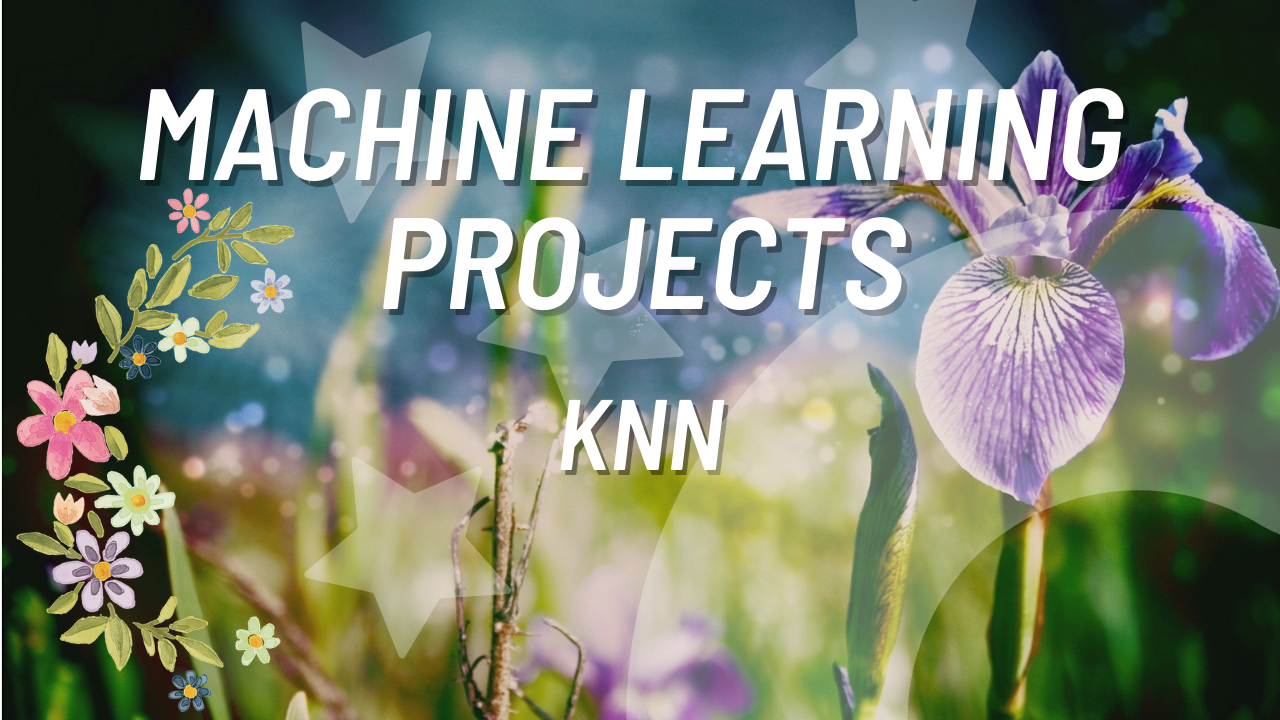
</div>

# Import All necessary library

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import plotly.express as px

# Data Cleaning and Processing


In [2]:
df = pd.read_csv('iris.csv')
df = df.drop('Id', axis=1)
print(df.shape)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.7,3.1,5.6,2.4,Iris-virginica
1,4.6,3.6,1.0,0.2,Iris-setosa
2,5.6,2.5,3.9,1.1,Iris-versicolor
3,5.0,3.4,1.6,0.4,Iris-setosa
4,5.6,2.7,4.2,1.3,Iris-versicolor


In [3]:
percent_of_training = 0.8
cutoff_ind = int(0.8*df.shape[0])

training_data = df.loc[0:cutoff_ind].values
testing_data = df.loc[cutoff_ind:].values

print('Training data: ',training_data.shape,type(training_data))
print('Testing data: ',testing_data.shape,type(training_data))

Training data:  (121, 5) <class 'numpy.ndarray'>
Testing data:  (30, 5) <class 'numpy.ndarray'>


# Data Visualization

In [4]:
# fig = px.scatter(x=df['SepalLengthCm'], y=df['SepalWidthCm'],color = df['Species'])
# fig.show()

In [5]:
# fig = px.scatter(x=df['PetalLengthCm'], y=df['PetalWidthCm'],color = df['Species'])
# fig.show()

In [6]:
# fig = px.scatter_3d(x=df['SepalLengthCm'], y=df['PetalLengthCm'],z=df['PetalWidthCm'],color = df['Species'])
# fig.show()

# Build Model

In [7]:
def euclidean_distance(pt1, pt2):
    """
    Calculate the Euclidean Distance between two points.
    """
    distance = 0.0
    for i in range(len(pt1)-1):
        distance += (pt1[i] - pt2[i])**2
    return sqrt(distance)

pt1 = [0,0]
pt2 = [1,0]
d = euclidean_distance(pt1,pt2)
print('The Euclidean Distance between {} and {} is {}'.format(pt1,pt2,d))

The Euclidean Distance between [0, 0] and [1, 0] is 1.0


In [8]:
def most_freq_cls(neighbors):
    """
    Return the predict class given K neighbors
    """
    max_freq = 0
    res = neighbors[0]
    for i in neighbors:
        freq = neighbors.count(i)
        if freq > max_freq:
            max_freq = freq
            res = i
    return res
    
neighbors = ['Iris-virginica','Iris-virginica','Iris-virginica'
             'Iris-setosa','Iris-setosa','Iris-setosa','Iris-setosa','Iris-setosa','Iris-setosa',
             'Iris-versicolor','Iris-versicolor']

print('The Predict Class is {}'.format(most_freq_cls(neighbors)))

The Predict Class is Iris-setosa


In [9]:
def knn(input_pt, training_data, num_neighbors):
    """
    Return the label of input points based on 
    training data using KNN
    """
    distances = list()
    
    for pt in training_data:
        dist = euclidean_distance(input_pt,pt)
        distances.append((pt, dist))
        
    distances.sort(key=lambda x:x[1])
    neighbors = list()

    for neighbor in distances[0:num_neighbors]:
        neighbors.append(neighbor[0][-1])

    predicted_label = most_freq_cls(neighbors)
    return predicted_label

input_pt = [6.1,2.8,4.7,1.2]
k=1
knn(input_pt, training_data, k) # True class is 'Iris-versicolor'

'Iris-versicolor'


# Make Prediction

In [10]:
k=1

train_prediction =[]
for row in training_data[:,0:4]:
    predict_class = knn(row,training_data,k)
    train_prediction.append(predict_class)
    
train_accuracy = sum(train_prediction == training_data[:,4])/len(train_prediction)
print('Training Accuracy is {}'.format(train_accuracy))


test_prediction =[]
for row in testing_data:
    predict_class = knn(row,training_data,k)
    test_prediction.append(predict_class)
    
test_accuracy = sum(test_prediction == testing_data[:,4])/len(test_prediction)
print('Testing Accuracy is {}'.format(test_accuracy))

Training Accuracy is 1.0
Testing Accuracy is 0.9666666666666667


# Visualiza Training Result

In [11]:
# fig = px.scatter(x=training_data[:,2],y=training_data[:,3],color = training_data[:,4])
# fig.show()

In [12]:
# fig = px.scatter(x=training_data[:,2],y=training_data[:,3],color = train_prediction)
# fig.show()

# Visualiza Testing Result

In [13]:
# fig = px.scatter(x=testing_data[:,2],y=testing_data[:,3],color = testing_data[:,4])
# fig.show()

In [14]:
# fig = px.scatter(x=testing_data[:,2],y=testing_data[:,3],color = test_prediction)
# fig.show()